In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import warnings
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
weather_set = pd.read_csv("data/cleaned_weather_set.csv")

In [3]:
# Konvertieren der Timestamp-Spalte in das Datumsformat
weather_set['timestamp'] = pd.to_datetime(weather_set['timestamp'])

# Hinzufügen einer Spalte für das Datum
weather_set['date'] = weather_set['timestamp'].dt.date

# Berechnung des durchschnittlichen Temperaturwertes pro Tag
avg_temperature_per_day = weather_set.groupby('date')['temperature'].mean().reset_index()

# Speichern des neuen Datensatzes
output_file_path = 'daily_avg_temperature.csv'  # Pfad zur Ausgabe-CSV-Datei
avg_temperature_per_day.to_csv(output_file_path, index=False)

print(f"Der Datensatz mit den durchschnittlichen Temperaturen pro Tag wurde unter '{output_file_path}' gespeichert.")

Der Datensatz mit den durchschnittlichen Temperaturen pro Tag wurde unter 'daily_avg_temperature.csv' gespeichert.


In [4]:
weather_set_averageTemp = pd.read_csv("daily_avg_temperature.csv")

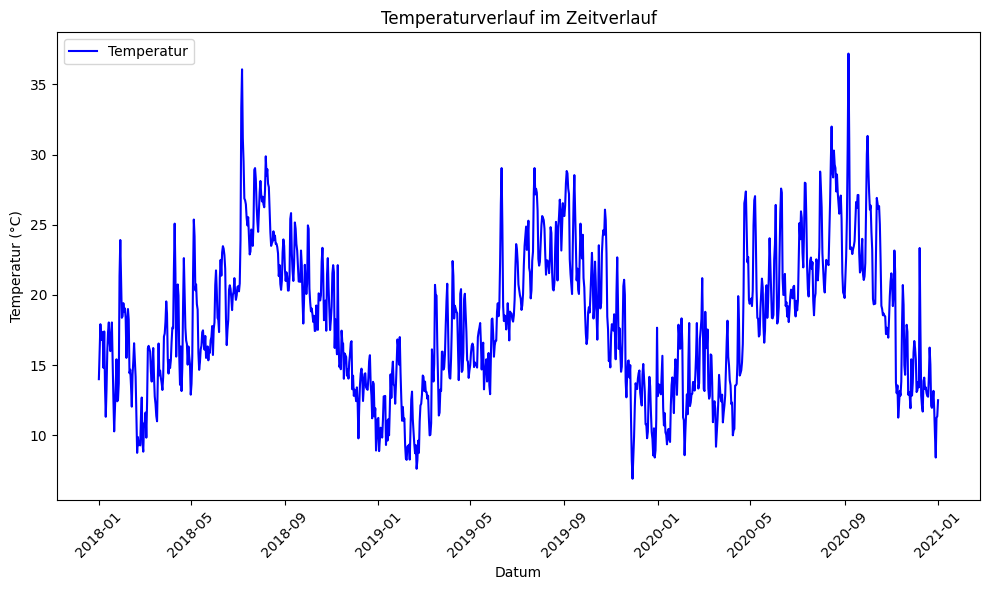

In [5]:
weather_set_averageTemp['date'] = pd.to_datetime(weather_set_averageTemp['date'])

# Erstellen des Plots
plt.figure(figsize=(10, 6))
plt.plot(weather_set_averageTemp['date'], weather_set_averageTemp['temperature'], label='Temperatur', color='b')

# Titel und Beschriftungen
plt.title('Temperaturverlauf im Zeitverlauf')
plt.xlabel('Datum')
plt.ylabel('Temperatur (°C)')

# Optional: X-Achse formatieren (z.B. Datum anzeigen)
plt.xticks(rotation=45)

# Legende
plt.legend()

# Anzeigen des Plots
plt.tight_layout()
plt.show()

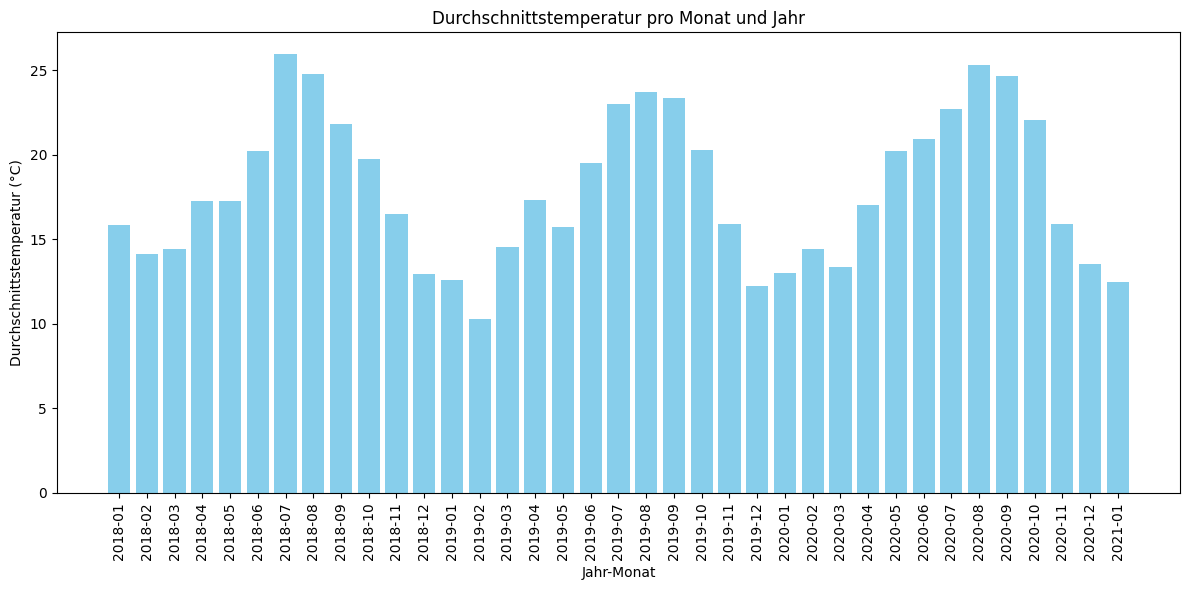

In [6]:
weather_set_averageTemp['date'] = pd.to_datetime(weather_set_averageTemp['date'])

# Jahr und Monat extrahieren
weather_set_averageTemp['year'] = weather_set_averageTemp['date'].dt.year
weather_set_averageTemp['month'] = weather_set_averageTemp['date'].dt.month

# Berechnung der durchschnittlichen Temperatur pro Jahr und Monat
avg_temperatures = weather_set_averageTemp.groupby(['year', 'month'])['temperature'].mean().reset_index()

# Erstellen des Balkendiagramms
plt.figure(figsize=(12, 6))
# Kombiniere Jahr und Monat für die X-Achse, z.B. '2022-01' für Januar 2022
avg_temperatures['year_month'] = avg_temperatures['year'].astype(str) + '-' + avg_temperatures['month'].astype(str).str.zfill(2)

# Erstellen des Balkendiagramms
plt.bar(avg_temperatures['year_month'], avg_temperatures['temperature'], color='skyblue')

# Titel und Beschriftungen
plt.title('Durchschnittstemperatur pro Monat und Jahr')
plt.xlabel('Jahr-Monat')
plt.ylabel('Durchschnittstemperatur (°C)')

# Optional: X-Achse formatieren (dreh die Labels, damit sie lesbar sind)
plt.xticks(rotation=90)

# Layout optimieren
plt.tight_layout()

# Diagramm anzeigen
plt.show()

In [7]:
df = pd.read_csv('data/weather_burbank_airport.csv')

# Schritt 2: Timestamp auf Datum reduzieren
df['date'] = pd.to_datetime(df['timestamp']).dt.date

# Schritt 3: Durchschnittlichen cloud_cover pro Tag und Stadt berechnen
daily_avg = df.groupby(['city', 'date'])['cloud_cover'].mean().reset_index()

# Schritt 4: Speichern des neuen Datensatzes
# Die Datei wird als CSV gespeichert
daily_avg.to_csv('daily_avg_cloud_cover.csv', index=False)

print("Der neue Datensatz wurde erfolgreich gespeichert!")

Der neue Datensatz wurde erfolgreich gespeichert!


In [8]:
weather_set3 = pd.read_csv("daily_avg_cloud_cover.csv")
weather_set3

,city,date,cloud_cover
0,Burbank,2018-01-01,32.000000
1,Burbank,2018-01-02,28.333333
2,Burbank,2018-01-03,27.875000
3,Burbank,2018-01-04,30.083333
4,Burbank,2018-01-05,31.250000
...,...,...,...
1092,Burbank,2020-12-28,21.035714
1093,Burbank,2020-12-29,30.360000
1094,Burbank,2020-12-30,33.400000
1095,Burbank,2020-12-31,33.320000


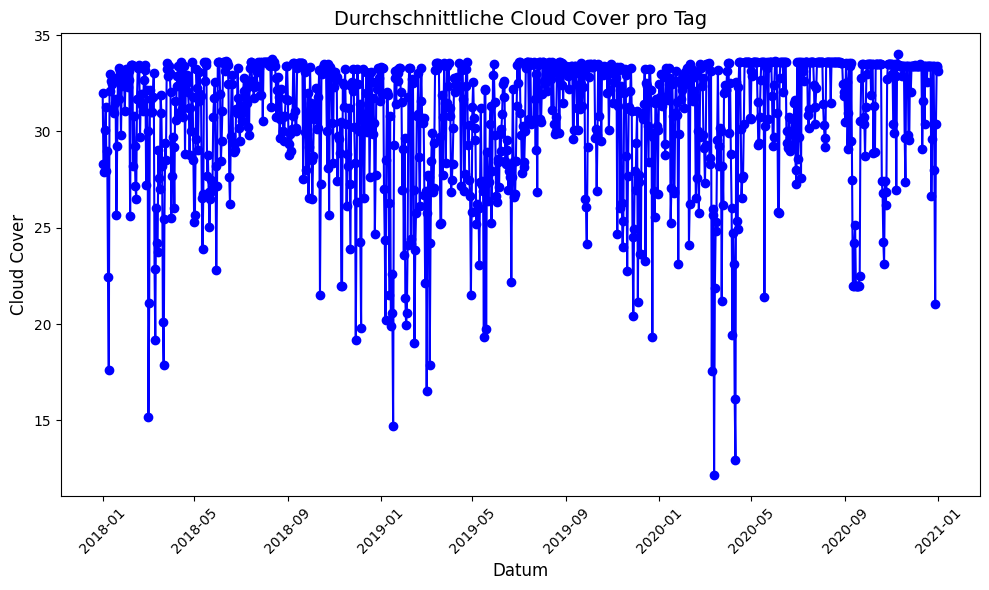

In [9]:
weather_set3['date'] = pd.to_datetime(weather_set3['date'])

# Den Mittelwert des 'cloud_cover' pro Tag berechnen
weather_set3_daily = weather_set3.groupby('date')['cloud_cover'].mean().reset_index()

# Den Plot erstellen
plt.figure(figsize=(10,6))
plt.plot(weather_set3_daily['date'], weather_set3_daily['cloud_cover'], marker='o', linestyle='-', color='b')

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Durchschnittliche Cloud Cover pro Tag', fontsize=14)
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Cloud Cover', fontsize=12)

# Rotieren der x-Achsen-Beschriftung für bessere Lesbarkeit
plt.xticks(rotation=45)

# Anzeige des Plots
plt.tight_layout()
plt.show()